## Demonstration 4.1.7 Feature importance and feature selection

The breast cancer data set was initially curated by Dr William Wolberg at the University of Wisconsin-Madison. It was created based on the fine needle aspirate of breast masses and the corresponding digitalised images. Each feature represents an image of a fine needle aspirate of a breast mass.
This data set is often used to explain concepts in machine learning. For example, predictive models that could accurately classify tumours in breast cancer patients as benign (non-cancerous) or malignant (cancerous).

The data set comprises several features extracted from the digitised image of the FNA (fine needle aspiration). These features describe characteristics of the cell nuclei present in the image. Typically, the data set includes 30 features, such as:
- `Radius`: mean of distances from the center to points on the perimeter
- `Texture`: standard deviation of grayscale values
- `Smoothness`: local variation in radius lengths
- `Concavity`: severity of concave portions of the contour
- `Concave points`: number of concave portions of the contour
- `Target`: indicates whether the cancer is benign or malignant, making it a binary classification problem.

In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd

# Load the data.
from sklearn.datasets import load_breast_cancer


In [ ]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Load the Breast Cancer data set.
bc_dataset = load_breast_cancer()

# Convert data set into a DataFrame.
df_bc = pd.DataFrame(bc_dataset.data,
                     columns=bc_dataset.feature_names)

df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Add the target variable to the DataFrame.
df_bc['target'] = bc_dataset.target

# Set the variables for features and target.
X = bc_dataset.data
y = bc_dataset.target

# Optionally, view the first few rows of the DataFrame.
print(df_bc.shape)
df_bc.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### a. Determine feature information with the mutual importance (MI) method
> Model 1: Original data set

In [ ]:
# Import necessary library.
from sklearn.model_selection import train_test_split as tts

# Split the data into train and test data sets.
X_train_1, X_test_1, y_train, y_test = tts(X, y,
                                           random_state=10,
                                           stratify=y)

In [ ]:
# Employ mutual information (MI) to determine feature importance.
from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(X, y)

# View the MI score.
print(mi_score)

[0.36435324 0.09300462 0.40464817 0.35697272 0.08246651 0.21381851
 0.37489619 0.43994706 0.07004704 0.00927338 0.24649732 0.
 0.27587137 0.34300687 0.01540288 0.07606957 0.11789836 0.1236388
 0.01411356 0.04084286 0.45680862 0.11741536 0.4746651  0.46423518
 0.09643943 0.22354573 0.31706898 0.43801304 0.0934286  0.06846889]


In [ ]:
# Find the column number of features (original data set) where MI > 0.1.
mi_score_selected_index = np.where(mi_score > 0.1)[0]

# View the columns.
print("Index numbers of features with MI > 0.1:", mi_score_selected_index)

# Create a subset of the data containing features with MI > 0.1.
X_2 = X[:, mi_score_selected_index]

# View the shape of the data.
X_2.shape

Index numbers of features with MI > 0.1: [ 0  2  3  5  6  7 10 12 13 16 17 20 21 22 23 25 26 27]


(569, 18)

In [ ]:
# Split the new data set into train and test data.
# Note: This is the second X_test, X_train, y_test, and y_train data sets.
X_train_2, X_test_2, y_train, y_test = tts(X_2, y,
                                           random_state=10,
                                           stratify=y)

In [ ]:
# Find the column number of features (original data set) where MI < 0.1.
mi_score_selected_index = np.where(mi_score < 0.1)[0]

# Create a subset of the data containing features with MI < 0.1.
# Note: This is the third X_test, X_train, y_test, and y_train data sets.
X_3 = X[:,mi_score_selected_index]

# View the shape of the data.
X_3.shape

(569, 12)

In [ ]:
# Split the new data set into train and test data.
X_train_3, X_test_3, y_train, y_test = tts(X_3, y,
                                           random_state=10,
                                           stratify=y)

> Test the accuracy of three models:
> - Model 1: Original data set
> - Model 2: MI > 0.1
> - Model 3: MI < 0.1

In [ ]:
# Compare the accuracy of the original data set, data set with MI > 0.1, and data set with MI < 0.1.
from sklearn.tree import DecisionTreeClassifier

# Run the DecisionTreeClassifier on the three models.
model_1 = DecisionTreeClassifier().fit(X_train_1, y_train)
model_2 = DecisionTreeClassifier().fit(X_train_2, y_train)
model_3 = DecisionTreeClassifier().fit(X_train_3, y_train)

# Create the accuracy score.
score_1 = model_1.score(X_test_1, y_test)
score_2 = model_2.score(X_test_2, y_test)
score_3 = model_3.score(X_test_3, y_test)

# View the scores.
print(f"Model 1: {score_1}\n Model 2: {score_2}\n Model 3: {score_3}")

Model 1: 0.9370629370629371
 Model 2: 0.958041958041958
 Model 3: 0.8671328671328671


In [ ]:
# View the feature indices of Model 2.
mi_score_selected_index = np.where(mi_score > 0.1)[0]

# View the columns.
print("Indices of selected features (Model 2):", mi_score_selected_index)

Indices of selected features (Model 2): [ 0  2  3  5  6  7 10 12 13 16 17 20 21 22 23 25 26 27]


### b. Perform feature selection with automatic selection

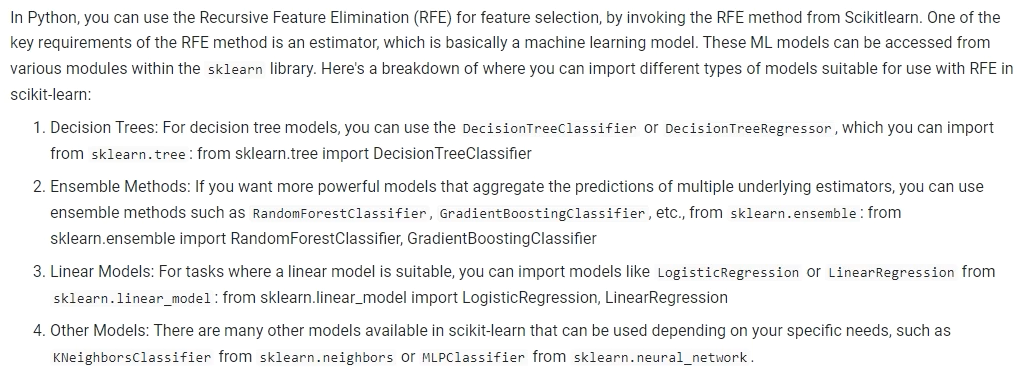

In [ ]:
# Automatically select features with the SelectKBest() method.
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif, k=20)
X_reduced_best = selector.fit_transform(X, y)

# View the shape of the data.
print(X_reduced_best.shape)

(569, 20)


In [ ]:
# Employ the SelectPercentile() method.
from sklearn.feature_selection import SelectPercentile

selector_2 = SelectPercentile(mutual_info_classif, percentile=25)
X_reduced_percentile = selector_2.fit_transform(X, y)

# View the shape of the data.
print(X_reduced_percentile.shape)

(569, 8)


> Test the accuracy of the two models:
> - Model 4: Top 20 features based on the MI method
> - Model 5: Top 8 features based on the percentile method

In [ ]:
# Split the data into train and test data for both methods.
# Note: This is the fourth X_test, X_train, y_test, and y_train data sets.
X_train_4, X_test_4, y_train, y_test = tts(X_reduced_best, y,
                                           random_state=10,
                                           stratify=y)

# Note: This is the fifth X_test, X_train, y_test, and y_train data sets.
X_train_5, X_test_5, y_train, y_test = tts(X_reduced_percentile, y,
                                           random_state=10,
                                           stratify=y)

In [ ]:
# View the accuracy of both methods.
print(f"Model 1: {score_1}")

model_4 = DecisionTreeClassifier().fit(X_train_4, y_train)
score_4 = model_4.score(X_test_4, y_test)
print(f"Model 4: {score_4}")

model_5 = DecisionTreeClassifier().fit(X_train_5, y_train)
score_5 = model_5.score(X_test_5, y_test)
print(f"Model 5: {score_5}")

Model 1: 0.9370629370629371
Model 4: 0.951048951048951
Model 5: 0.9020979020979021


In [ ]:
# Get the Boolean mask indicating which features are selected.
selected_features_mask = selector_2.get_support()

# Find the indices of the selected features.
selected_features_indices = np.where(selected_features_mask)[0]

# Print the indices of the selected features.
print("Indices of selected features (Model 5):", selected_features_indices)

Indices of selected features (Model 5): [ 0  2  6  7 20 22 23 27]


### c. Feature selection with the recursive feature elimination (RFE) method

In [ ]:
# Employ recursive feature elimination (RFE).
#works iteratively to remove the least important feature
from sklearn.feature_selection import RFE

rfe = RFE(DecisionTreeClassifier(), n_features_to_select=10, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_

# View the ranking of features.
print(ranking)

[21 15 18 13 12  8 10  1  7  6  3  5 16  1  2 20 14 11  1  4  1  1  1  1
  1  9  1  1 17 19]


In [ ]:
# Transform the data.
X_selected_RFE = rfe.transform(X)

# View the shape of the data.
X_selected_RFE.shape

(569, 10)

> Test the accuracy of the model:
> - Model 6: Top 10 features based on the RFE method

In [ ]:
# Split the data into train and test data.
# Note: This is the sixth X_test, X_train, y_test, and y_train data sets.
X_train_6, X_test_6, y_train, y_test = tts(X_selected_RFE, y,
                                           random_state=10,
                                           stratify=y)

In [ ]:
# View the accuracy of the output.
model_6 = DecisionTreeClassifier().fit(X_train_6, y_train)
score_6 = model_6.score(X_test_6, y_test)

# View the accuracy scores.
print(f"Model 1: {score_1}")
print(f"Model 6: {score_6}")

Model 1: 0.9370629370629371
Model 6: 0.951048951048951


# Key information
Feature importance can be employed to determine the most important features in a data set. Based on the feature importance score, feature selection can be performed with two methods. However, the application of feature selection based on feature importance can have an effect on the accuracy score and performance of a machine learning model.